In [366]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.gridspec as gridspec

In [426]:
data = {'t':[0, 1, 2, 3, 4, 4.8], 'x':[0, 1, 1, 0, 1, 0], 'y':[0, 0, 1, 1, 0, 1], 'session':[5, 5, 5, 23, 23, 4]}

df = pd.DataFrame(data)

df_shift = df[1 :]
df_shift = df_shift.reset_index(drop=True)

fragments = [x.reset_index(drop=True) for _, x in df.groupby(by = ['session'])]

def calculate_speed(fragment):
    fragment_shift = fragment[1 :]
    fragment_shift = fragment_shift.reset_index(drop=True)

    fragment['Vx'] = (fragment.x - fragment_shift.x) / (fragment.t - fragment_shift.t)
    fragment['Vy'] = ((fragment.y - fragment_shift.y) / (fragment.t - fragment_shift.t))

    return fragment.groupby(by = ['x', 'y']).sum()


print(calculate_speed(fragments[2]))

Vx = np.array(velocities['Vx']).reshape(2,2)
Vy = np.array(velocities['Vy']).reshape(2,2).T

       t  session   Vx   Vy
x y                        
0 1  3.0       23  1.0 -1.0
1 0  4.0       23  0.0  0.0


Text(0.5, 1, 'Varying Density')

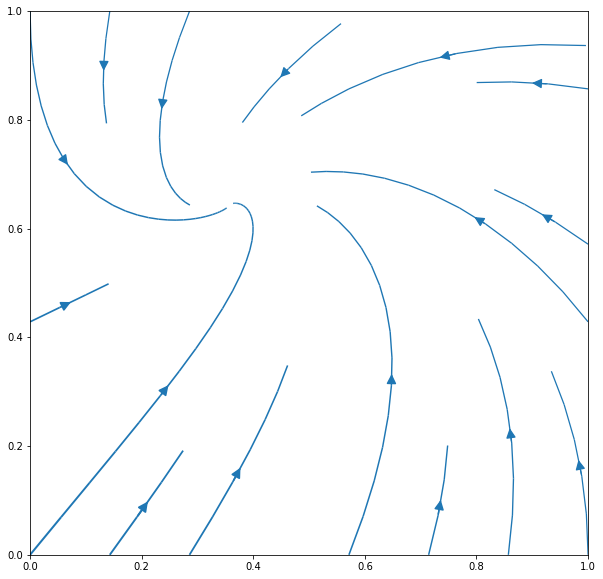

In [423]:
Y, X = np.mgrid[0:2, 0:2]

speed = np.sqrt(Vx**2 + Vy**2)
lw = 2*speed / speed.max()

fig = plt.figure(figsize=(10, 10))

plt.streamplot(X, Y, Vx, Vy, density=0.5,arrowsize=2, linewidth=lw, cmap='Reds')
ax1.set_title('Varying Density')